<a href="https://colab.research.google.com/github/ADVAIT135/Global_AI_ML/blob/main/Mushroom_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [2]:
data = pd.read_csv('/content/mushrooms.csv')

In [3]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [7]:
classes = data['class'].value_counts()
classes

e    4208
p    3916
Name: class, dtype: int64

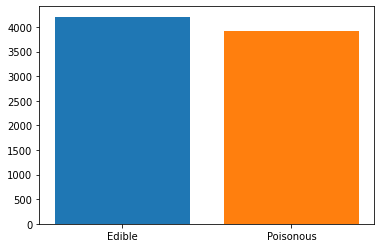

In [8]:
plt.bar('Edible', classes['e'])
plt.bar('Poisonous', classes['p'])
plt.show()

In [9]:
x = data.loc[:,['cap-shape','cap-color','ring-number','ring-type']]
y = data.loc[:,'class']

In [10]:
encoder = LabelEncoder()
for i in x.columns:
  x[i] = encoder.fit_transform(x[i])
y = encoder.fit_transform(y)

In [11]:
x

,cap-shape,cap-color,ring-number,ring-type
0,5,4,1,4
1,5,9,1,4
2,0,8,1,4
3,5,8,1,4
4,5,3,1,0
...,...,...,...,...
8119,3,4,1,4
8120,5,4,1,4
8121,2,4,1,4
8122,3,4,1,0


In [12]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [14]:
Log_class =  LogisticRegression()
ridge_class = RidgeClassifier()
dec_tree = DecisionTreeClassifier()
naive_bay = GaussianNB()
NN = MLPClassifier()

In [15]:
Log_class.fit(x_train, y_train)
ridge_class.fit(x_train, y_train)
dec_tree.fit(x_train, y_train)
naive_bay.fit(x_train, y_train)
NN.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier()

In [16]:
Log_class_pred = Log_class.predict(x_test)
ridge_class_pred = ridge_class.predict(x_test)
dec_tree_pred = dec_tree.predict(x_test)
naive_bay_pred = naive_bay.predict(x_test)
NN_pred = NN.predict(x_test)

In [17]:
Log_class_report = classification_report(y_test, Log_class_pred)
ridge_class_report = classification_report(y_test, ridge_class_pred)
dec_tree_report = classification_report(y_test,dec_tree_pred)
naive_bay_report = classification_report(y_test,naive_bay_pred)
NN_report = classification_report(y_test,NN_pred)

In [18]:
print('*******Logistic Regression*******')
print(Log_class_report)
print('*******Ridge Regression*******')
print(ridge_class_report)
print('*******Decision Tree *******')
print(dec_tree_report)
print('*******Naive Bayes Theorem*******')
print(naive_bay_report)
print('*******Neural Network*******')
print(NN_report)

*******Logistic Regression*******
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1238
           1       0.80      0.79      0.79      1200

    accuracy                           0.80      2438
   macro avg       0.80      0.80      0.80      2438
weighted avg       0.80      0.80      0.80      2438

*******Ridge Regression*******
              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1238
           1       0.80      0.79      0.79      1200

    accuracy                           0.80      2438
   macro avg       0.80      0.80      0.80      2438
weighted avg       0.80      0.80      0.80      2438

*******Decision Tree *******
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1238
           1       0.89      0.93      0.91      1200

    accuracy                           0.91      2438
   macro avg       0.91      0.91 

In [19]:
random_for = RandomForestClassifier()
random_for.fit(x_train,y_train)

RandomForestClassifier()

In [20]:
random_for_pred = random_for.predict(x_test)

In [21]:
random_for_report = classification_report(y_test, random_for_pred)

In [23]:
print(random_for_report)

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      1238
           1       0.89      0.93      0.91      1200

    accuracy                           0.91      2438
   macro avg       0.91      0.91      0.91      2438
weighted avg       0.91      0.91      0.91      2438

